In [2]:
# ===========================
# Python version and Packages
# ===========================
# install Python 3.12.0
# install pandas
# install numpy
# install seaborn
# install scikit-learn
# install matplotlib

# ===========================
# Data Manipulation & Numerical Computation
# ===========================
import math # standard python math functions
import numpy as np # core numerical computing library, arrays, linear algebra
import pandas as pd # data analysis, manipulation, CSV file I/O (pd.read_CSV)
from pandas.plotting import scatter_matrix #creates scatter matrix from DataFrames
from sklearn.preprocessing import StandardScaler

# ===========================
# Visualization
# ===========================
import matplotlib.pyplot as plt # core plotting and data analysis library
import seaborn as sns # improved charts

# ===========================
# Machine Learning Models & Tools
# ===========================
import sklearn # machine learning library, submodules must be imported
from sklearn.model_selection import train_test_split # splits datasets into random train/test subsets for validation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # evaluate model performance, not for regression
from sklearn.feature_selection import SelectFromModel # feature selection utility
from sklearn.impute import SimpleImputer # fills in missing values in datasets

# ===========================
# Linear Regression
# ===========================
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# ===========================
# K Nearest Neighbor Regression
# ===========================
from sklearn.neighbors import KNeighborsRegressor

# ===========================
# Random Forest Regression
# ===========================
from sklearn.ensemble import RandomForestRegressor

# ===========================
# Extreme Gradient Boosting Regression
# ===========================
from xgboost import XGBRegressor
# use homebrew to install libomp
# For compilers to find libomp you may need to set:
#  export LDFLAGS="-L/opt/homebrew/opt/libomp/lib"
#  export CPPFLAGS="-I/opt/homebrew/opt/libomp/include"

# ===========================
# Support Vector Regression
# ===========================
from sklearn.svm import SVR

# ===========================
# Statistical Functions & Metrics
# ===========================
from scipy.stats import pearsonr # calculates Pearson correlation coefficient and p-value for linear correlation between two variables
from scipy.stats import randint, uniform # random number generators
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import PredictionErrorDisplay

# ===========================
# Interactivity
# ===========================
import ipywidgets as widgets

# ===========================
# Utility
# ===========================
from pathlib import Path
import joblib # For saving and loading models

# import tarfile (may not be needed bc data is csv file)
# import urllib.request (may not be needed bc data is in the same directory)


In [3]:
# Load Housing Data and return Pandas DataFrame
df_raw = pd.read_csv('kc_house_data.csv')

# About the Dataset
This dataset contains detailed information on house sales in King County, Washington, which includes the city of Seattle. It covers residential properties sold between May 2014 and May 2015. The dataset, available on Kaggle, provides a rich set of features such as number of bedrooms and bathrooms, square footage, location coordinates, renovation details, and more—making it well-suited for predictive modeling and exploratory analysis of real estate market trends.


**Dataset Overview**

This dataset contains detailed information about 21,613 house sales in King County, Washington. Below is a description of each variable:
    
There are 21 columns in the data set.

The following column definitions were found for the data set:

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [4]:
# Look at several rows using `head()`
df_raw.head()

# sqft_living does seem to be an addition of sqft_above and sqft_basement
# Need to figure out how sqft_living15 and sqft_lot15 differ from the non-15 categories. Found, see Dataset info.
# Need to understand grade category and how it is measured / applied. Found, see Dataset info.
# At minimum, id should be removed. It is likely an MLS ID and not useful for Machine Learning
# Date likely will not be useful for this project, but could be used for more complex analysis to track value changes over time.
# It looks like waterfront and view may be binary, so simply true/false for those attributes. Found, see Dataset info.
# After locating the column definitions, id should be dropped.
# For the purposes of this project, date should also be dropped.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Check for duplicates in the data
num_duplicates = df_raw.duplicated().sum()
print (num_duplicates)

# Check for duplicates BEFORE dropping or eliminating data.

0


In [6]:
duplicates = df_raw.duplicated()
print("Number of duplicates: ", duplicates.sum())
print("Duplicate row IDs:", df_raw.loc[duplicates, "id"].tolist())

Number of duplicates:  0
Duplicate row IDs: []


In [7]:
# Should all data to be dropped happen here? No. Columns can be selected when models are trained.
# Check for "id" column. If present, remove "id" column before proceding.
# if "id" in df_raw.columns:
#    df_raw.drop(columns=["id"], inplace=True)

# Since ID is a unique identifier for each home sale, it could be used to make sure data set and test set remain consistent when data set
# is updated. This is not necessary for this project, but should be considered before updating data. 
# After further consideration, let's leave id in for now.

In [8]:
# Check out datatypes using .dtypes
df_raw.dtypes

# Interesting to see that, with the exception of date, all fields are numerical. Expected to see more text attributes in real estate data. 

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
# Use info() to gather description of data
df_raw.info()

# 21 columns total
# All columns have the same Non-Null Count. It appears that there is no missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
# It appears that there are no null values in the data, but let's check just to make sure
df_raw.isnull().sum()

# It is confirmed that there are no null values in the data. May not have to impute any data for this set.
# For future projects, keep in mind that other characters such as -, /, _, ?, etc might be used to indicate missing data. 
# A comprehensive search for null values should search for a list of common characters indicating null as well.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
# Use value_counts() to confirm categories in view
# pd.set_option('display.max_colwidth', None), not needed for a single column
# pd.set_option('display.width', 200), not needed for a single column
# df["date"].value_counts()
df_raw["view"].value_counts()

# View must be a preset list of 5 options. View options would need to be determined. Found, see Dataset info. View is categorical.
# If view will be used in a model, it should be encoded. One-hot encoding is the likely option.

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

In [12]:
# Use value_counts() to confirm categories in waterfront
df_raw["waterfront"].value_counts()

# Waterfront is also categorical. It is already binary. No additional encoding should be necessary.

waterfront
0    21450
1      163
Name: count, dtype: int64

In [13]:
# Use value_counts() to confirm categories in yr_renovated
df_raw["yr_renovated"].value_counts()

# 21,613 - 20699 = 914 , roughly 4%,renovations doesn't seem like a significant number of renovations.
# The excessive age of some renovations seem to disqualify them. 1944? 1951?
# If renovations will be used in modeling, it should be converted to age of renovation.

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [14]:
# Use nunique() to better understand variation in the columns that contain categories
df_raw.nunique().sort_values()

# This confirms that waterfront, condition, view, and grade are categorical numbers
# 30 unique values for bathrooms seems high
# zipcode should also be considered a categorical number as they describe an area and are not used in mathematical calculations.
# Why are there only 21,436 unique id numbers, and there are 21,613 rows? Some homes must have sold multiple times. 
# Id must not be an MLS number. Each listing would have a unique id. These id's are property specific, not listing specific.

waterfront           2
view                 5
condition            5
floors               6
grade               12
bedrooms            13
bathrooms           30
zipcode             70
yr_renovated        70
yr_built           116
sqft_basement      306
date               372
long               752
sqft_living15      777
sqft_above         946
sqft_living       1038
price             4028
lat               5034
sqft_lot15        8689
sqft_lot          9782
id               21436
dtype: int64

In [15]:
# Use describe() to get summary of numerial attributes
# Limiting the display to two decimal places for easier translation of price. Does not alter long, lat data in the dataframe.
# Convert date object to datetime64 to determine date range. Found date range in description of dataset as well.
pd.set_option('display.float_format', '{:.2f}'.format)
df_raw["date"] = pd.to_datetime(df_raw["date"])
df_raw.describe()

# price will need to be transformed, use log transformation.
# If yr_built is used in model training, it may need to be converted to age
# sqft_living and sqft_lot have different mean, min, and max compared to sqft_living15 and sqft_lot15. Difference not clear.
# Difference found, see Dataset info.
# bedrooms and bathrooms both have a min of zero, which seems unusual. Zero bedrooms could be a loft. Zero bathrooms? Old house?
# Would be curious to see the whole rows for the zero bedroom and zero bathroom properties to see if they are real or mistakes.
# condition and grade have different mean and max. Must be measuring property differently. Found, see column info.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,...,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,2014-10-29 04:38:01.959931648,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,...,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
min,1000102.00,2014-05-02 00:00:00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,...,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,2014-07-22 00:00:00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,...,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,2014-10-16 00:00:00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,...,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,2015-02-17 00:00:00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,...,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,2015-05-27 00:00:00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,...,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00
std,2876565571.31,NaN,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,...,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18


In [16]:
# Count the number of homes with zero bathrooms to see if they can be dropped
count_zero_bathrooms = (df_raw["bathrooms"] == 0).sum()
print(count_zero_bathrooms)

10


In [17]:
# Count the number of homes with zero bedrooms to see if they can be dropped
count_zero_bedrooms = (df_raw["bedrooms"] == 0).sum()
print(count_zero_bedrooms)

13


In [18]:
# Count the number of homes with zero bathrooms and zero bedrooms
count_zero_bathrooms_bedrooms = ((df_raw["bathrooms"] == 0) & (df_raw["bedrooms"] == 0)).sum()
print(count_zero_bathrooms_bedrooms)

# 7 properties have 0 bathrooms and 0 bedrooms. An inspection of the 0 bathroom and 0 bedroom property rows is probably a good idea.

7


In [19]:
# Display all properties that have either 0 bathrooms, 0 bedrooms or both for further inspection.
selected_columns = ["id", "price", "bedrooms", "bathrooms", "sqft_living", "yr_built"]
df_zero_bath_or_bed = df_raw[(df_raw["bathrooms"] == 0) | (df_raw["bedrooms"] == 0)][selected_columns]
print(df_zero_bath_or_bed)

# 16 sales are affected. Only one house is old enough that it might not have a bathroom when built. While there are some that might be
# categorized as a loft due to size, most are sufficiently large and sufficiently new to assume that these are errors. These 16 sales
# should be dropped from the data before training.

               id      price  bedrooms  bathrooms  sqft_living  yr_built
875    6306400140 1095000.00         0       0.00         3064      1990
1149   3421079032   75000.00         1       0.00          670      1966
3119   3918400017  380000.00         0       0.00         1470      2006
3467   1453602309  288000.00         0       1.50         1430      1999
4868   6896300380  228000.00         0       1.00          390      1953
5832   5702500050  280000.00         1       0.00          600      1950
6994   2954400190 1295650.00         0       0.00         4810      1990
8477   2569500210  339950.00         0       2.50         2290      1985
8484   2310060040  240000.00         0       2.50         1810      2003
9773   3374500520  355000.00         0       0.00         2460      1990
9854   7849202190  235000.00         0       0.00         1470      1996
10481   203100435  484000.00         1       0.00          690      1948
12653  7849202299  320000.00         0       2.50  

In [20]:
# Test whether the id's of zero bath, zero bedroom affected properties are unique before removing
are_ids_unique = df_zero_bath_or_bed['id']
multiple_in_raw = df_raw[df_raw['id'].isin(are_ids_unique) & df_raw['id'].duplicated(keep=False)]['id'].unique()

if len(multiple_in_raw) == 0:
    print("All these IDs are unique in the full df_raw DataFrame.")
else:
    print("These IDs are duplicated in the full df_raw DataFrame:", multiple_in_raw)

All these IDs are unique in the full df_raw DataFrame.


In [21]:
# Since the id's are all unique in the dataframe, use the id's to drop the rows
df_raw = df_raw[~df_raw['id'].isin(are_ids_unique)]

test_removed_ids = df_raw[df_raw['id'].isin(are_ids_unique)]

if test_removed_ids.empty:
    print("ID's were successfully removed.")
else:
    print("These ID's were not removed:", test_removed_ids)
          

ID's were successfully removed.


In [22]:
# Since this dataset covers a single year, eliminate date column
# Check for "date" column. If present, remove "date" column before proceding.
#if "date" in df_raw.columns:
#   df_raw.drop(columns=["date"], inplace=True)
# Leaving the date in the dataset for now. Will not select it for modeling.

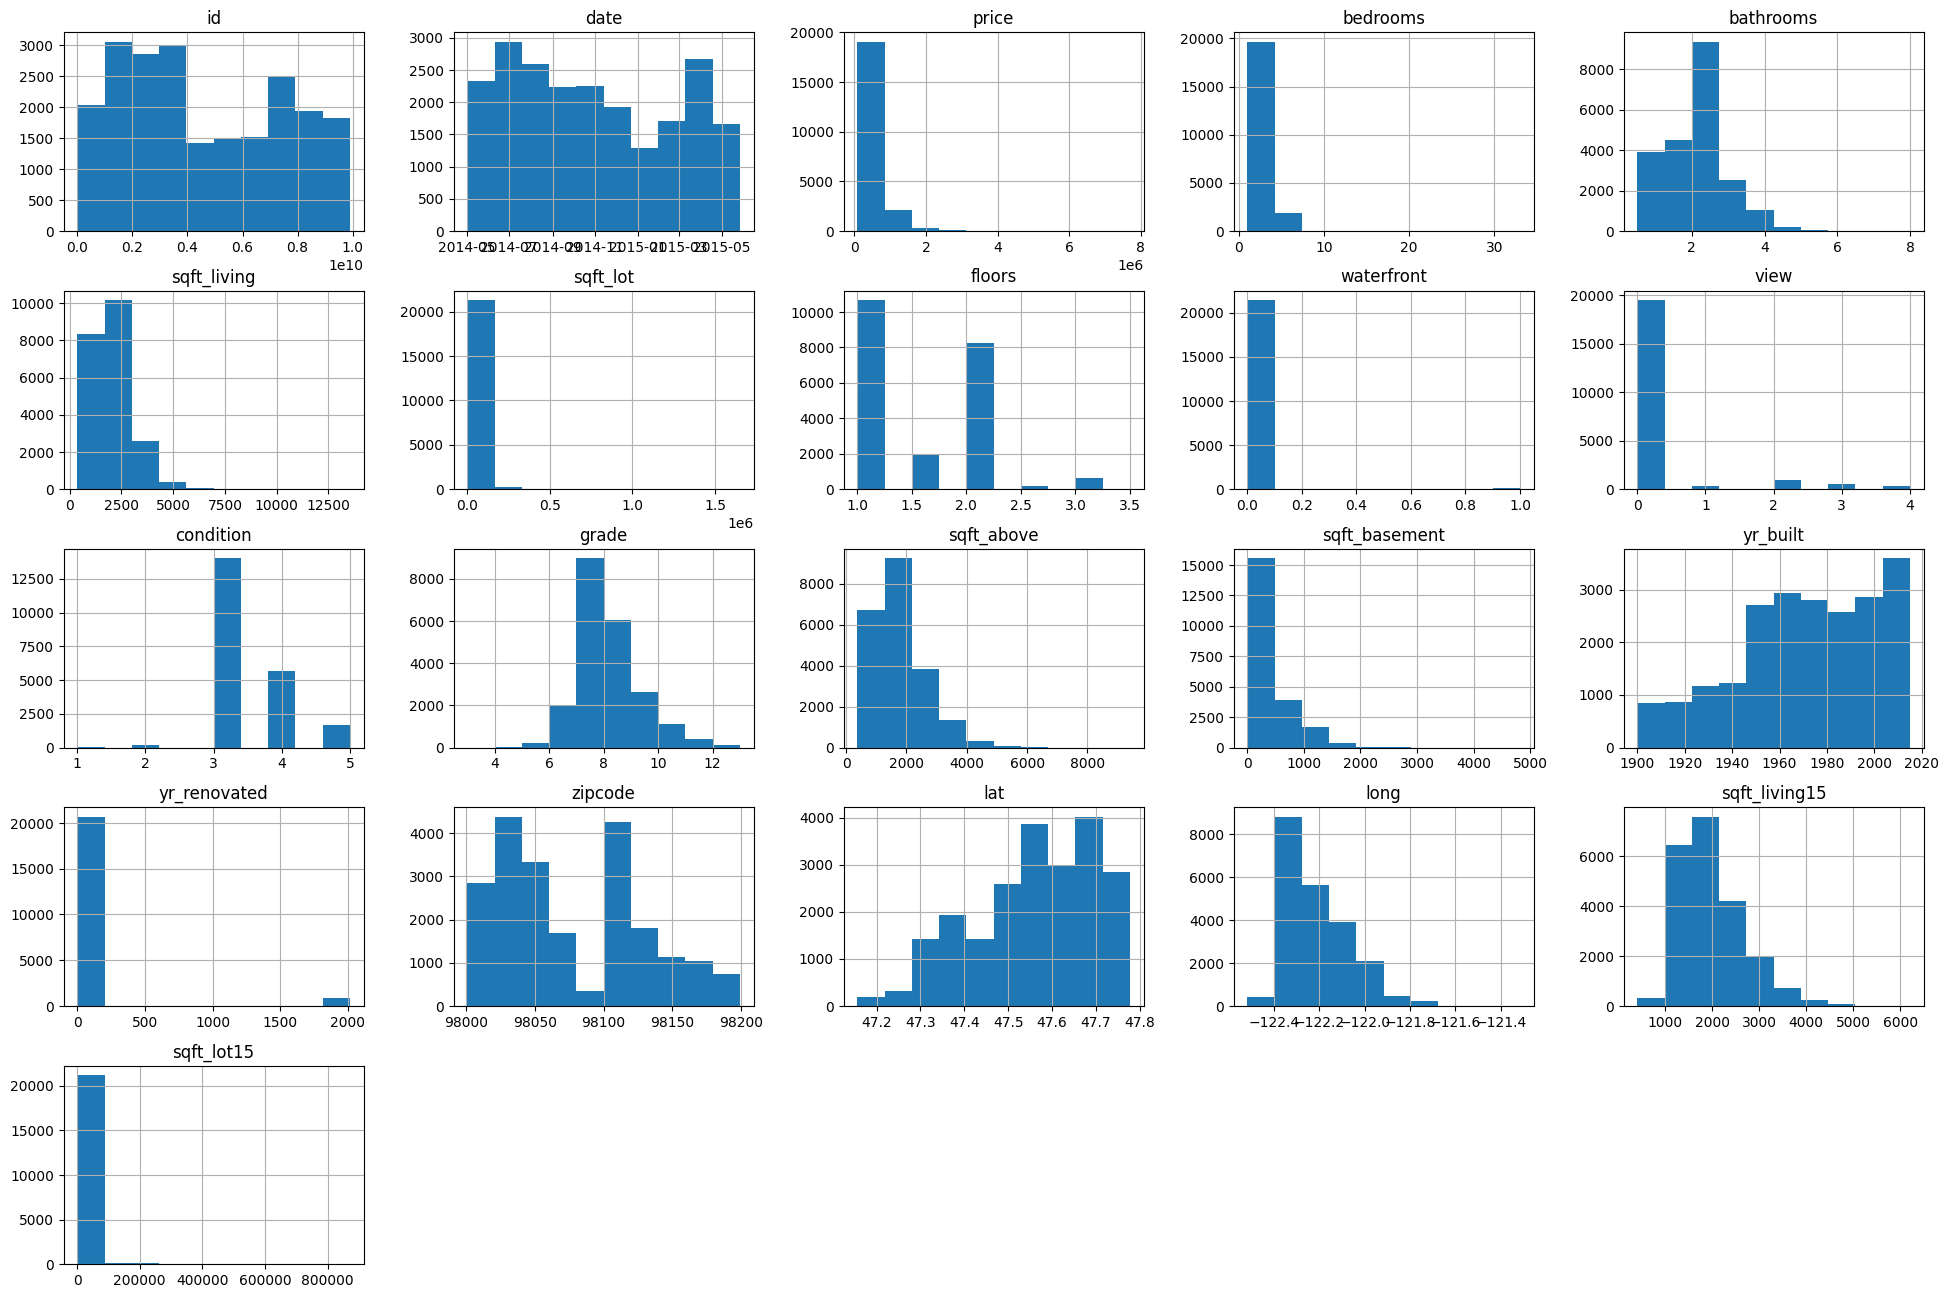

In [23]:
# Use hist() to plot histograms for the whole dataset
df_raw.hist(figsize=(24,16))
plt.show()

# Based on histogram of price, data is skewed and will need to be transformed before training models.
# Any attribute with sqft should be log transformed before using in a model.

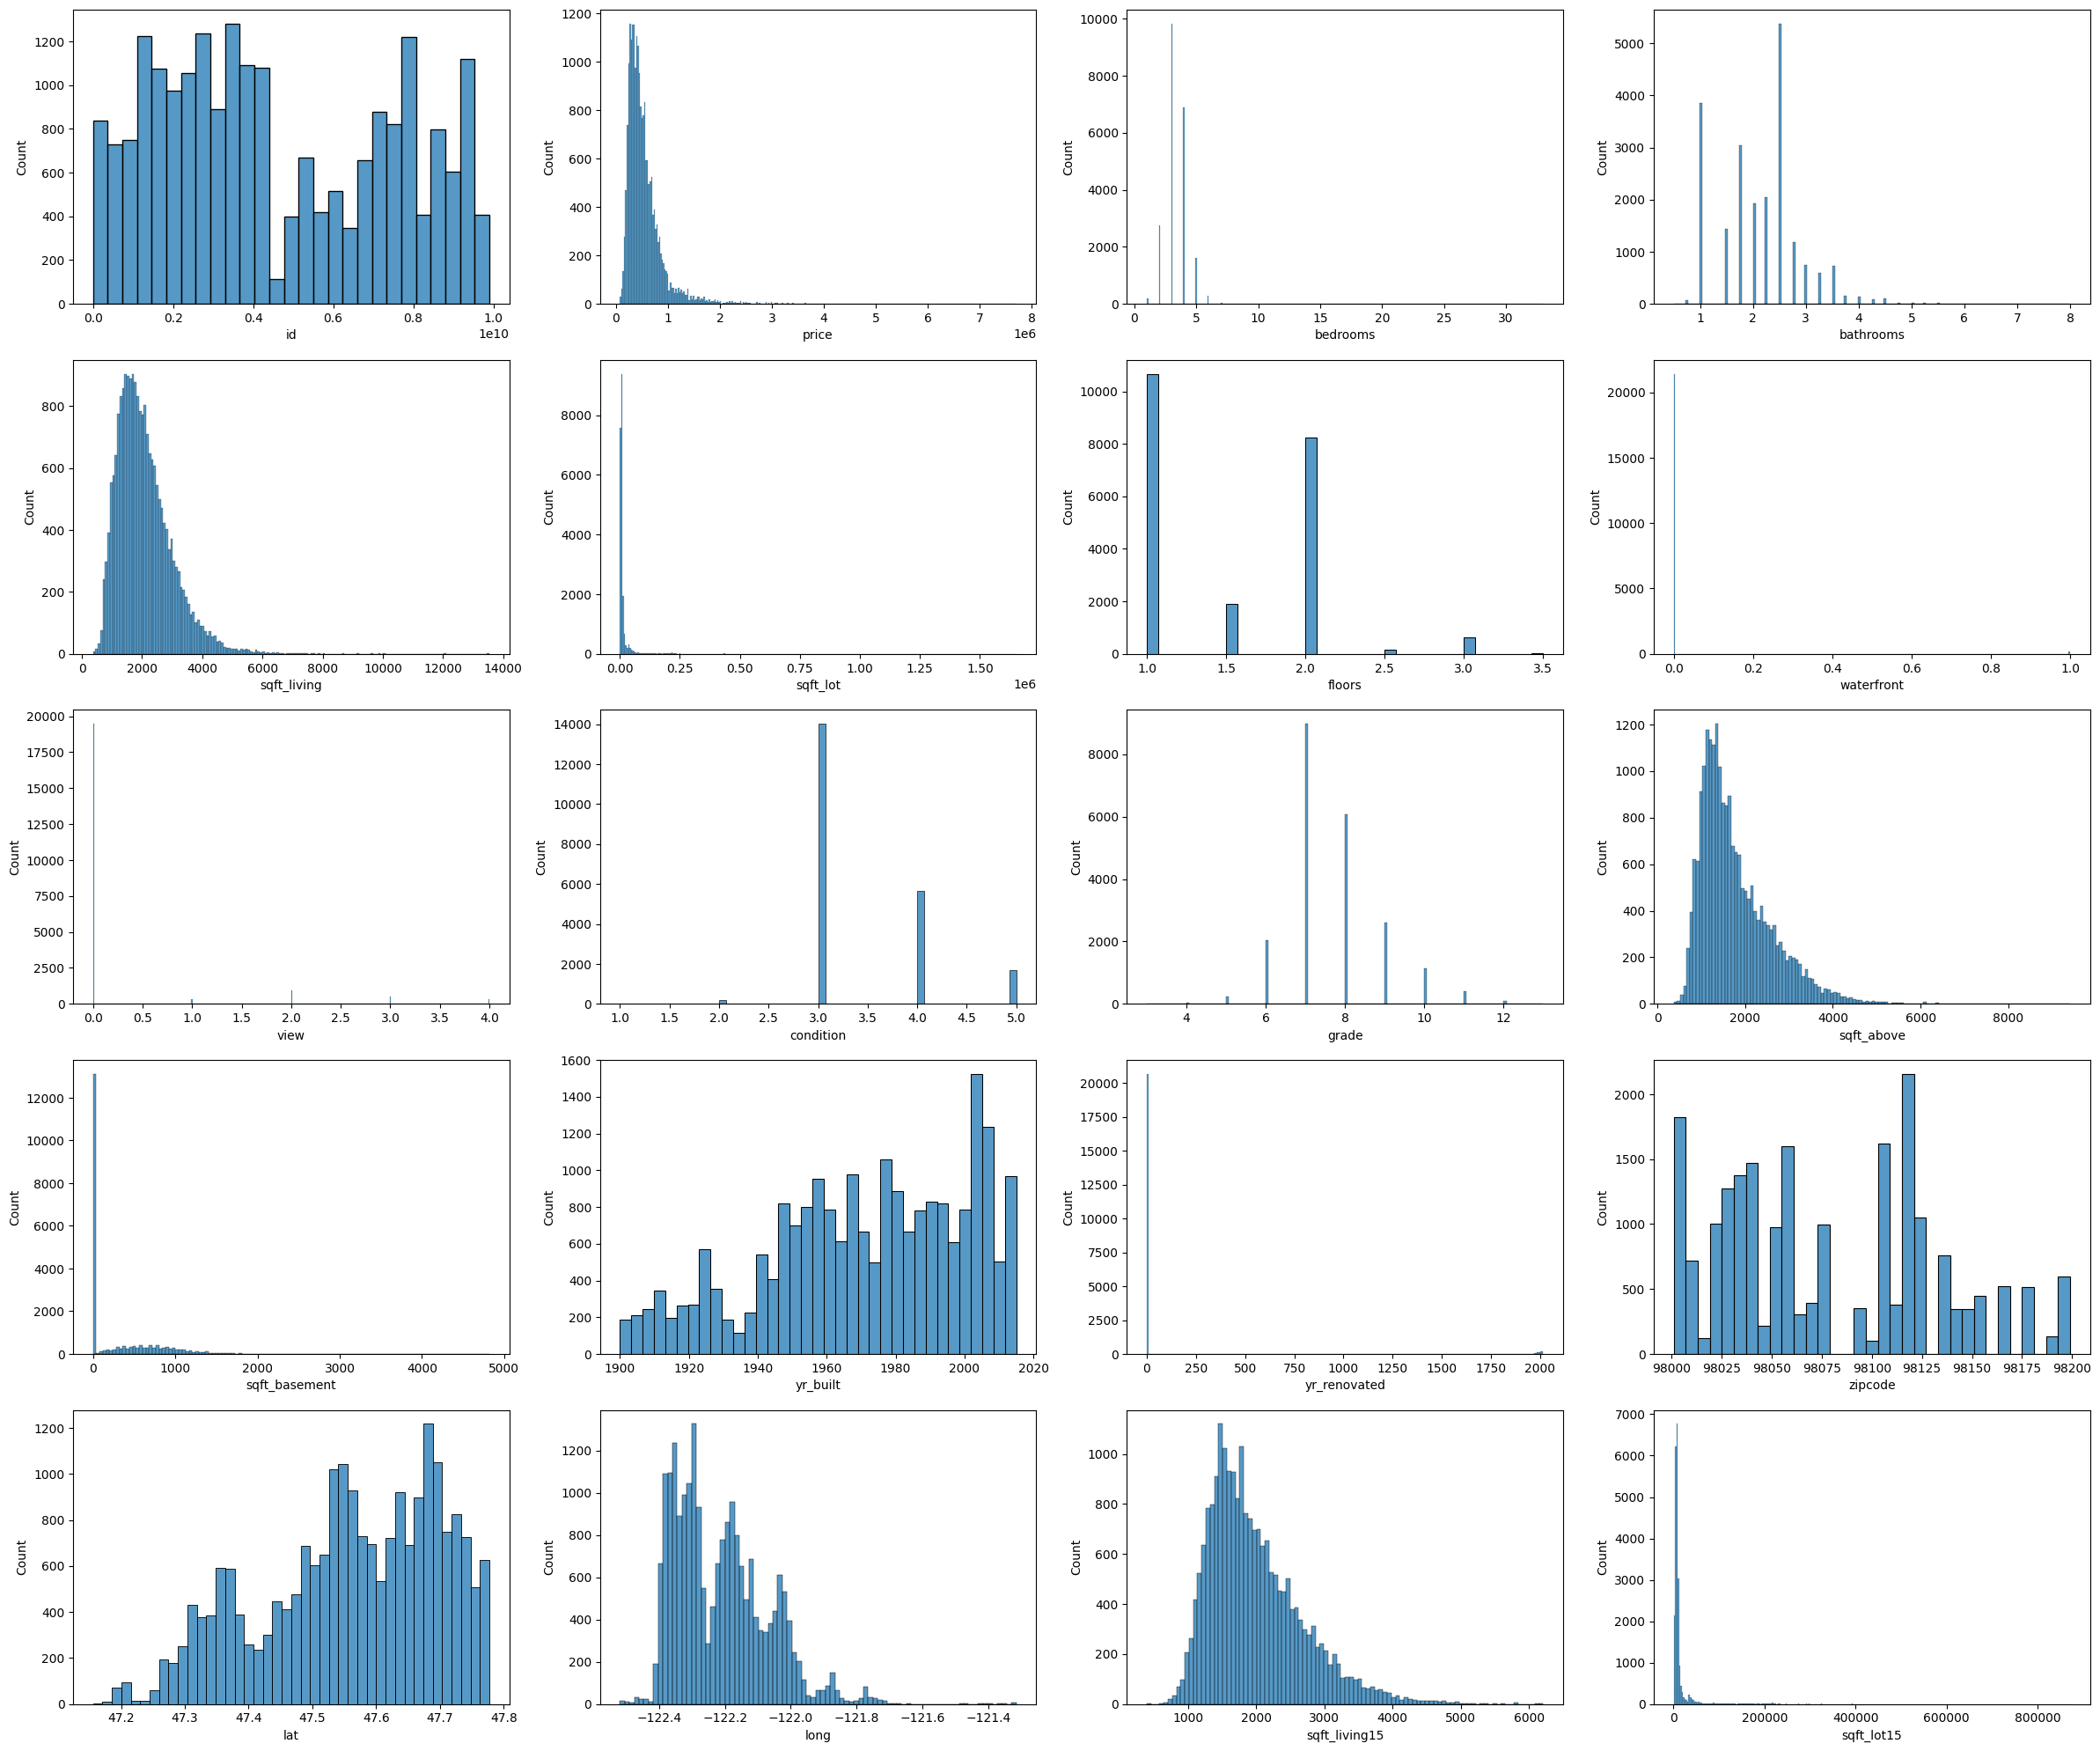

In [24]:
# Use histplot() to plot histograms for the whole dataset and compare matplotlib to seaborn
num_cols = len(df_raw.select_dtypes(include='number').columns)
ncols = 4
nrows = math.ceil(num_cols / ncols)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24, 4 * nrows))
axs = axs.flatten()
for i, column in enumerate(df_raw.select_dtypes(include='number').columns):
    sns.histplot(df_raw[column], ax=axs[i])
plt.tight_layout()
plt.show()

In [25]:
# Based on the histograms, look at max values for price, bedrooms, bathrooms, sqft_lot, sqft_lot15
# to see if there are outliers that should be eliminated

In [26]:
# Do any attributes need to be binned via pd.cut?
# None are readily apparent.

<function matplotlib.pyplot.show(close=None, block=None)>

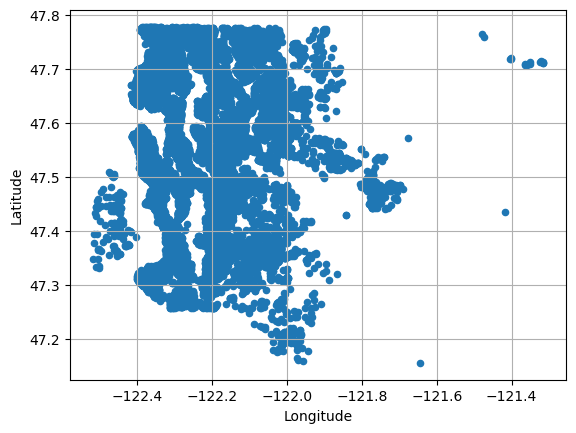

In [27]:
# Is there geographical data that needs to be visualized?
# Dataset does contain latitude and longitude so plotting is a good idea.
df_raw.plot(
    kind="scatter", 
    x="long", 
    y="lat", 
    grid=True, 
    xlabel="Longitude",
    ylabel="Latitude"
)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

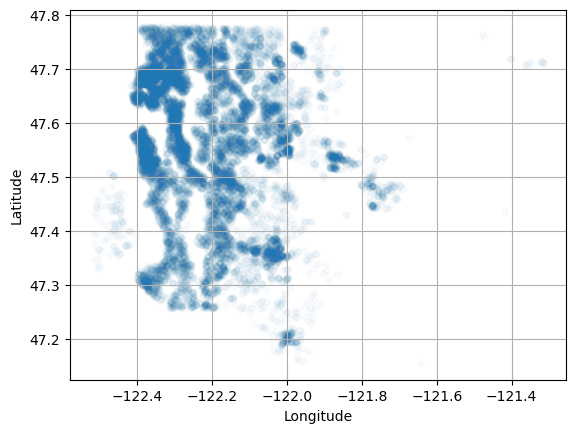

In [28]:
# Plot data with transparency to give a better indication of density
df_raw.plot(
    kind="scatter", 
    x="long", 
    y="lat", 
    grid=True, 
    alpha=0.025,
    xlabel="Longitude",
    ylabel="Latitude"
)
plt.show

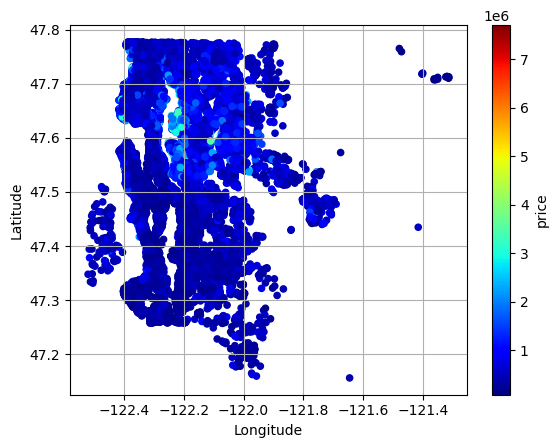

In [29]:
# Plot sales price data using a colormap
df_raw.plot(
    kind="scatter", 
    x="long", 
    y="lat", 
    grid=True,
    c="price", 
    cmap="jet", 
    colorbar=True,
    xlabel="Longitude",
    ylabel="Latitude"
)
plt.show()

In [30]:
# Look for correlation using Pearson's r with corr()
correlation_matrix = df_raw.corr()

# Added yellow highlight to easily spot the correlations above 0.7 on the correlation matrix
# Several columns do not have a correlation above 0.7 with price
def highlight_strong_correlation(val):
    color = 'background-color: yellow' if abs(val) > 0.7 and val != 1.0 else ''
    return color
correlation_matrix.style.map(highlight_strong_correlation)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005385,-0.016737,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
date,0.005385,1.000000,-0.003990,-0.016523,-0.034236,-0.034276,0.006337,-0.022333,0.001365,-0.001726,-0.050883,-0.039773,-0.027638,-0.019407,-0.000279,-0.024494,0.001605,-0.032485,-0.007228,-0.031198,0.002589
price,-0.016737,-0.003990,1.000000,0.308794,0.525905,0.701909,0.089882,0.256814,0.266437,0.397318,0.036025,0.667922,0.605371,0.323776,0.053984,0.126415,-0.053437,0.306777,0.022092,0.585247,0.082837
bedrooms,0.001150,-0.016523,0.308794,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,-0.034236,0.525905,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,-0.034276,0.701909,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.006337,0.089882,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,-0.022333,0.256814,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.001365,0.266437,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,-0.001726,0.397318,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904


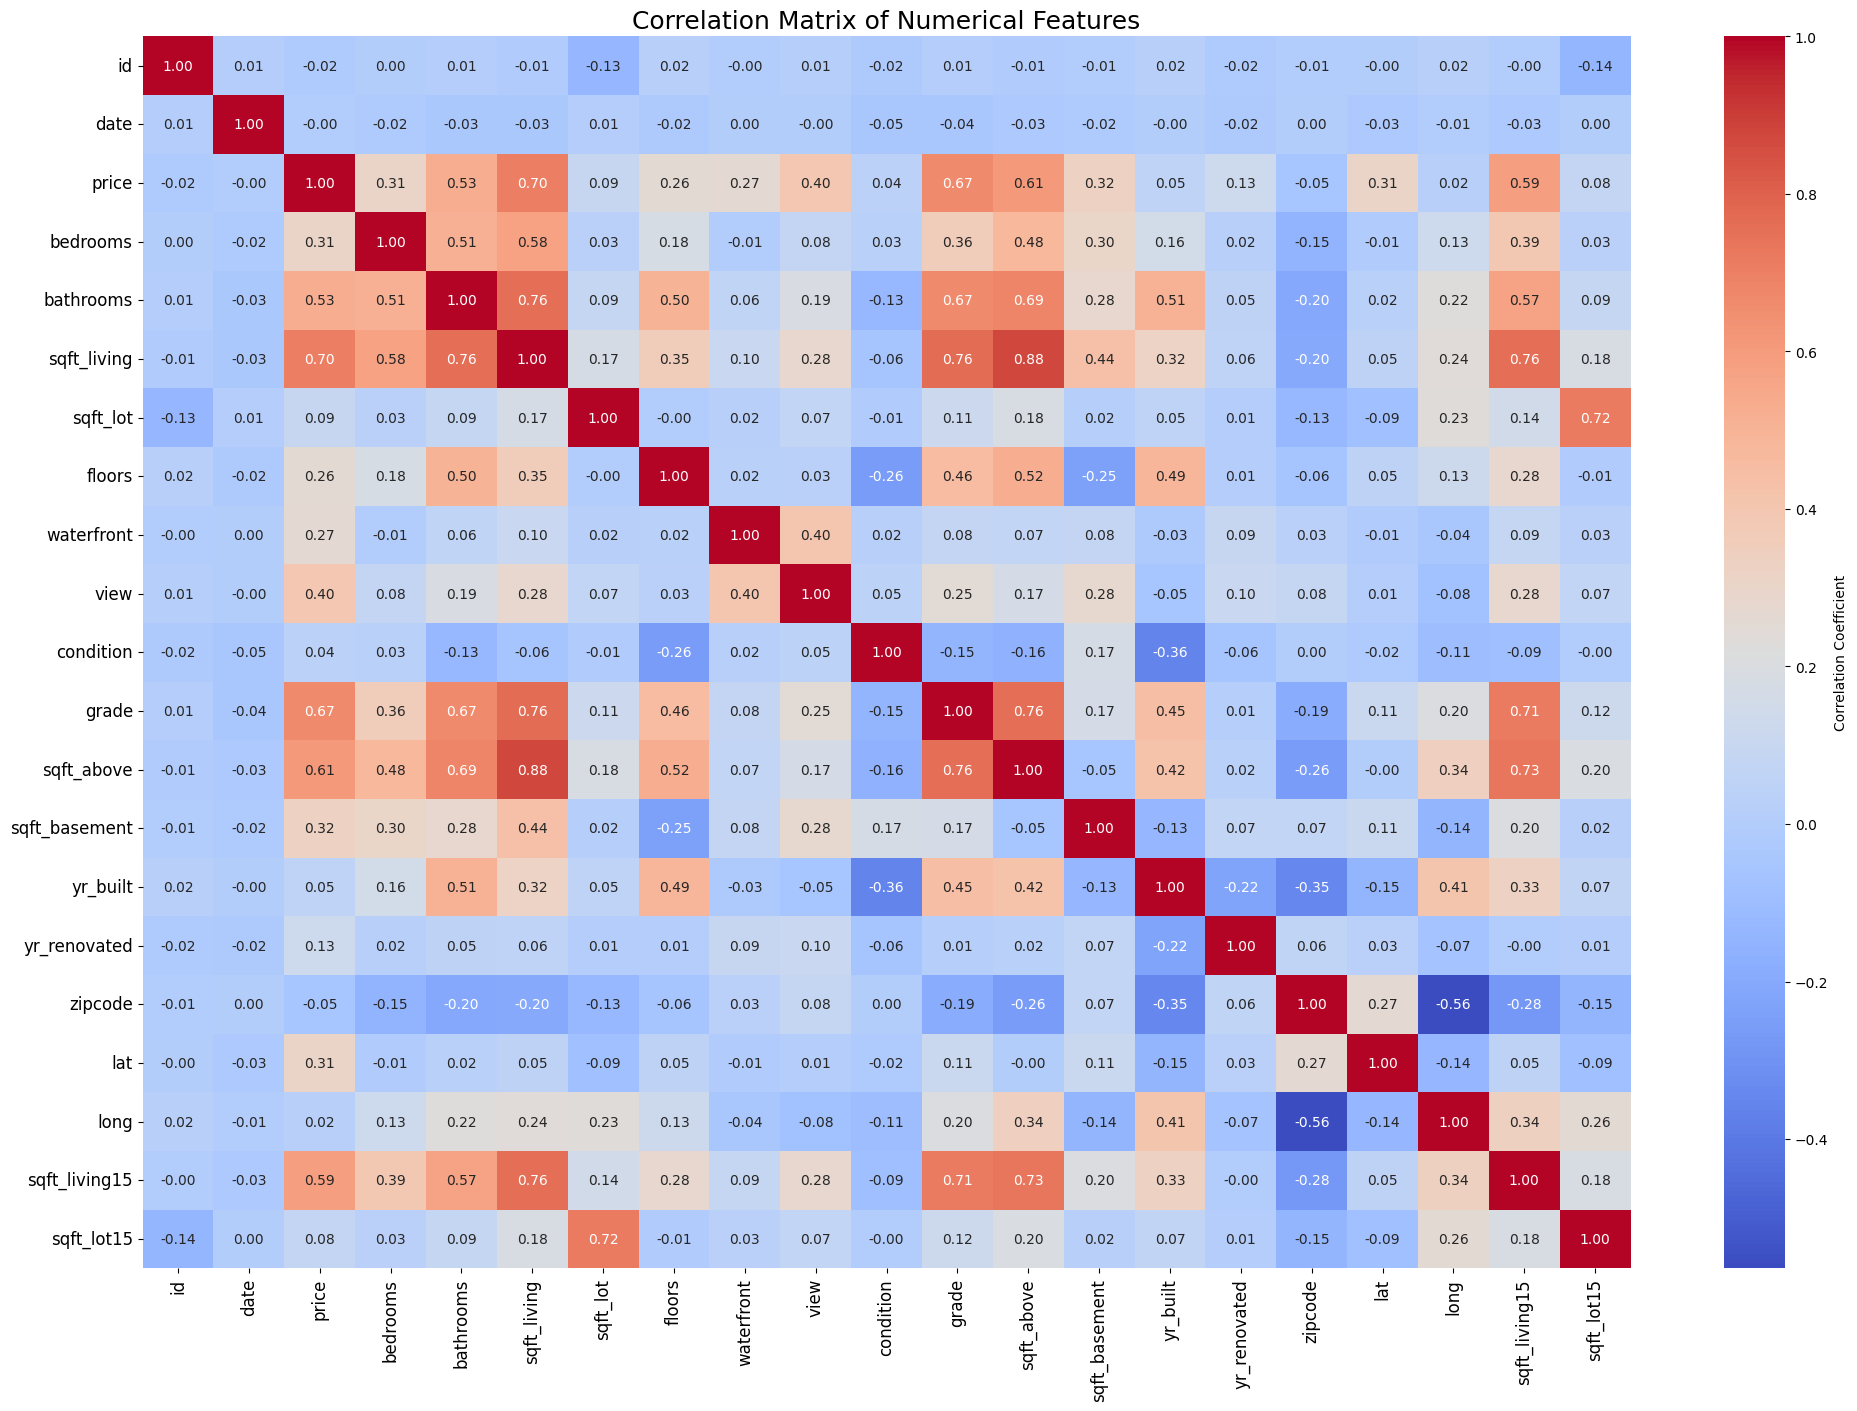

In [31]:
# Check for correlation correlation matrix heatmap
plt.figure(figsize=(24,16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numerical Features', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [32]:
# Let's see how much each attribute correlates with price and sort
correlation_matrix = df_raw.corr()
correlation_matrix["price"].sort_values(ascending=False)

# sqft_living has the highest correlation with price at .70. Others with high correlation are also related to sqft such as sqft_above, 
# sqft_basement, and sqft_living15.

price            1.00
sqft_living      0.70
grade            0.67
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.53
view             0.40
sqft_basement    0.32
bedrooms         0.31
lat              0.31
waterfront       0.27
floors           0.26
yr_renovated     0.13
sqft_lot         0.09
sqft_lot15       0.08
yr_built         0.05
condition        0.04
long             0.02
date            -0.00
id              -0.02
zipcode         -0.05
Name: price, dtype: float64

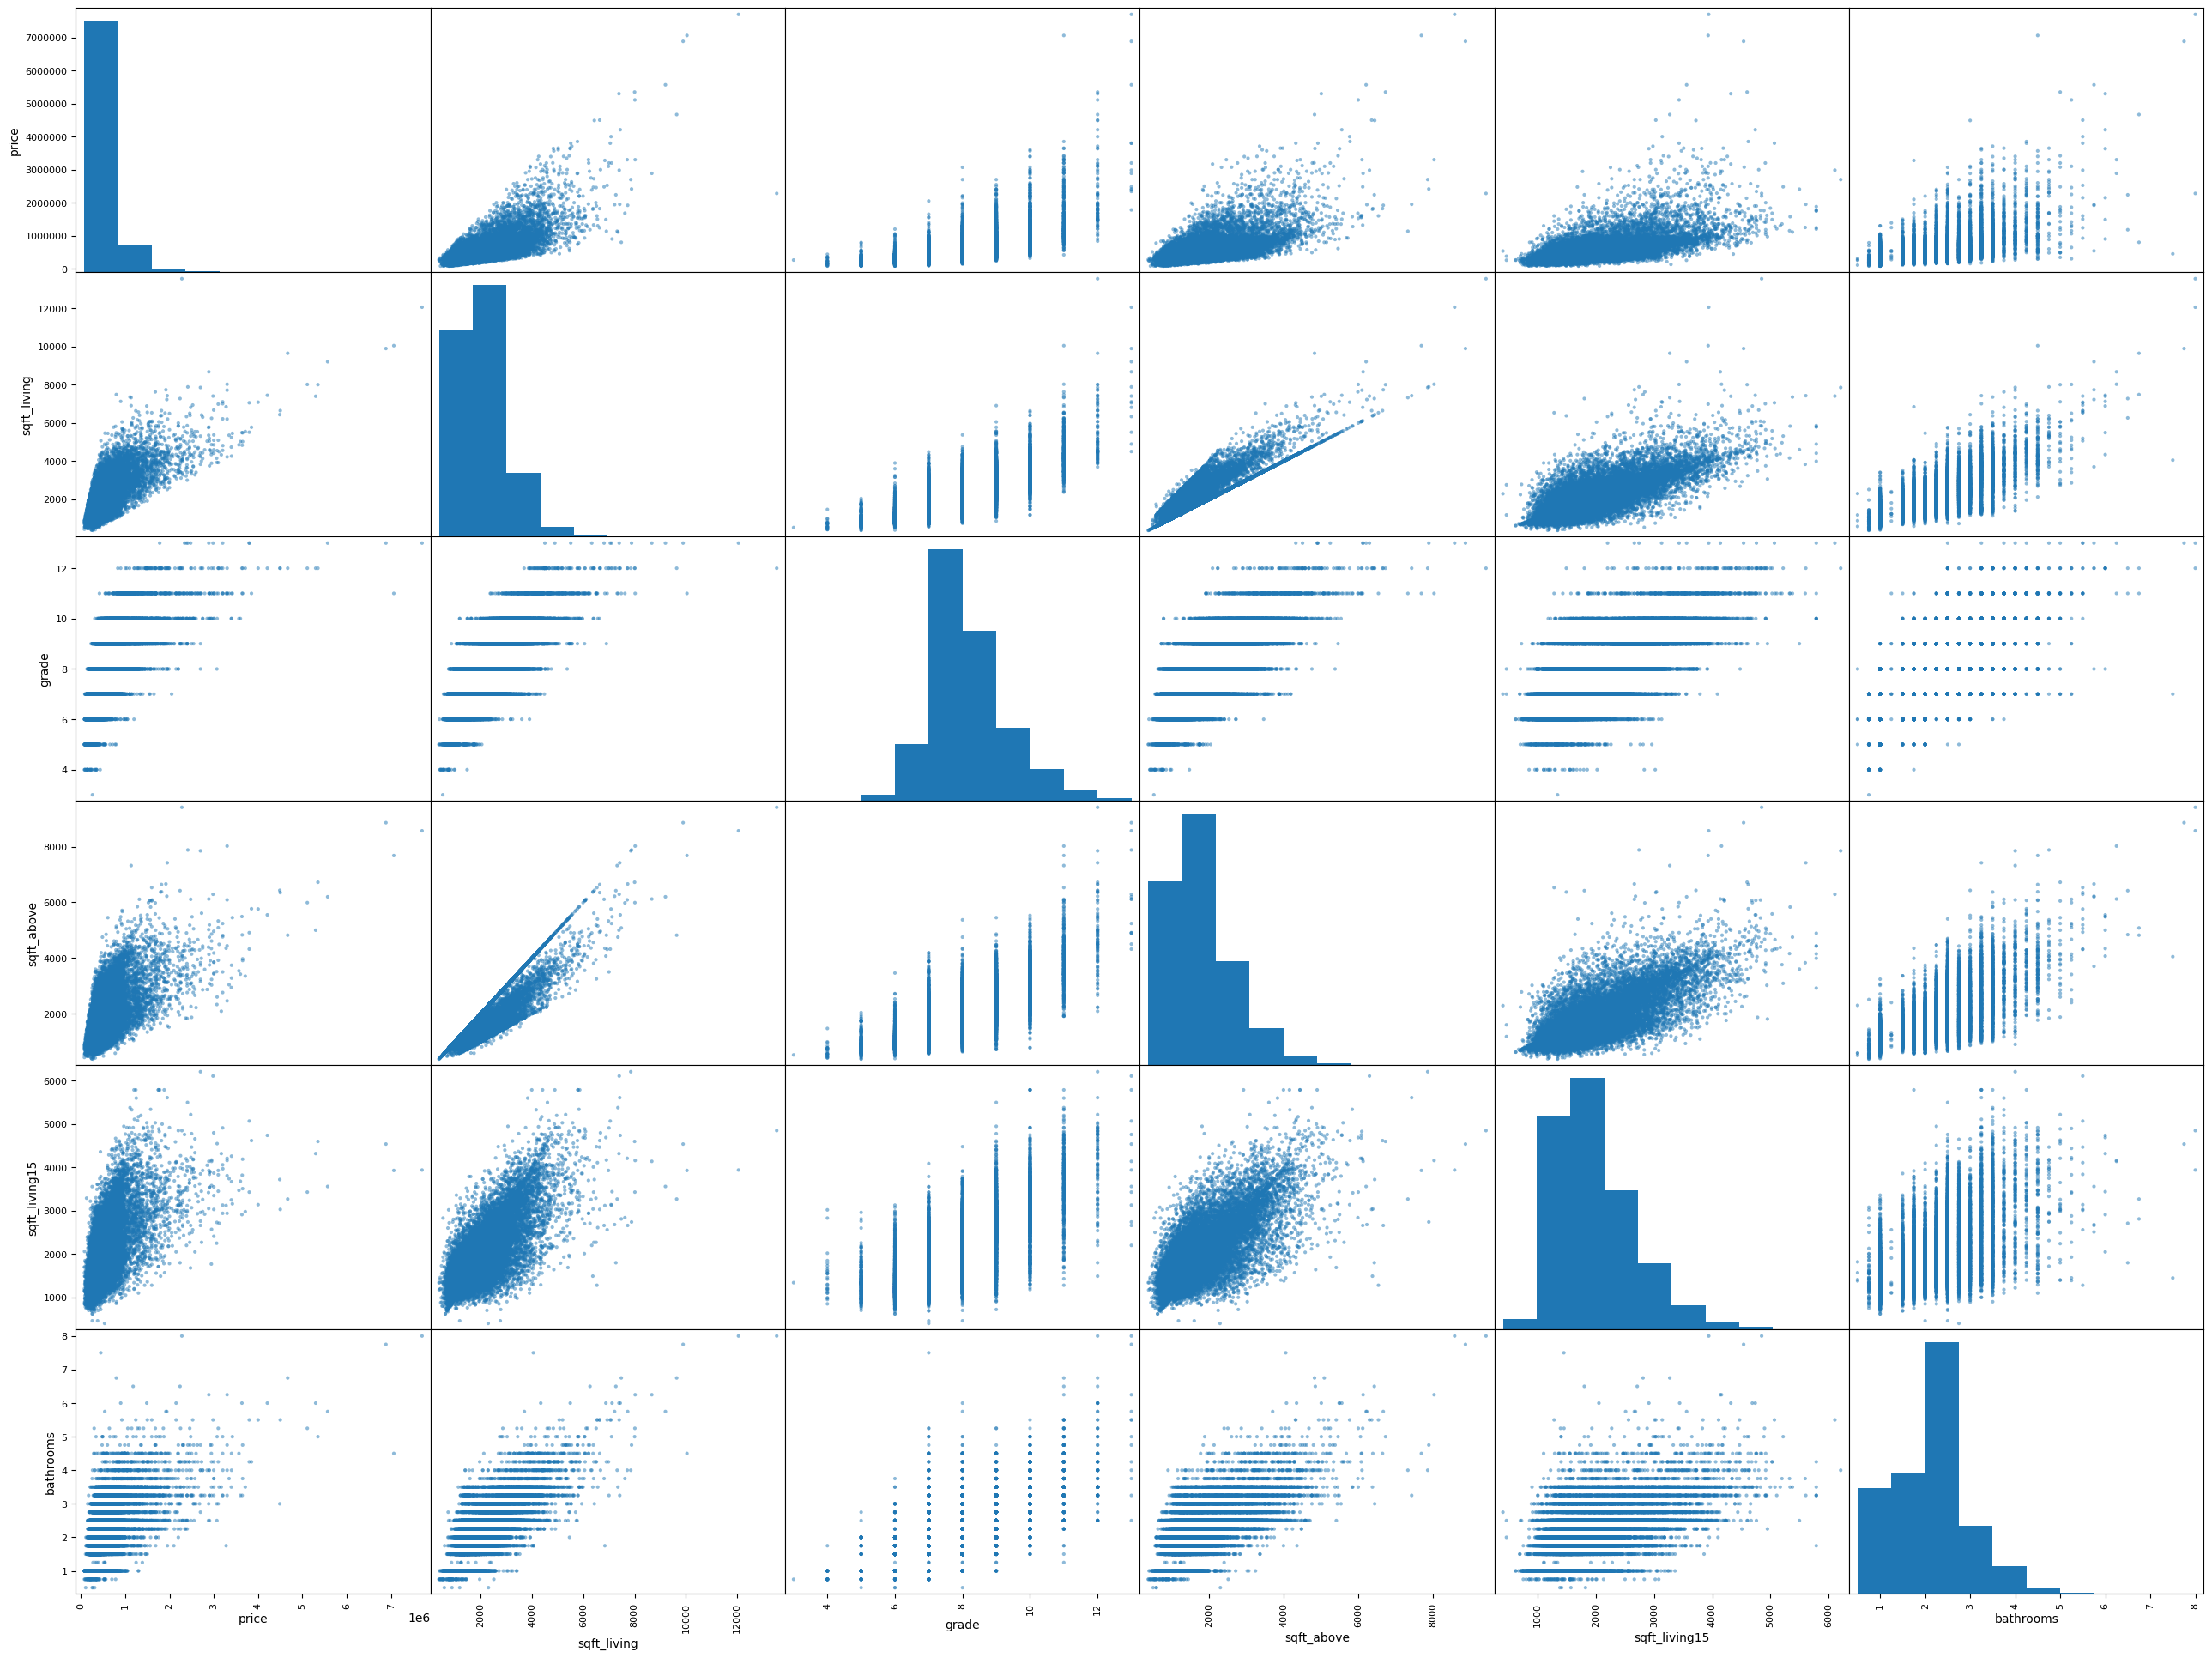

In [33]:
# Check for correlation in combinations with Pandas scatter_matrix
# Utilize the top 6 attributes: sqft_living, grade, sqft_above, sqft_living15, bathrooms, view
attributes = ["price", "sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms"]
scatter_matrix(df_raw[attributes], figsize=(32, 24))
plt.show()

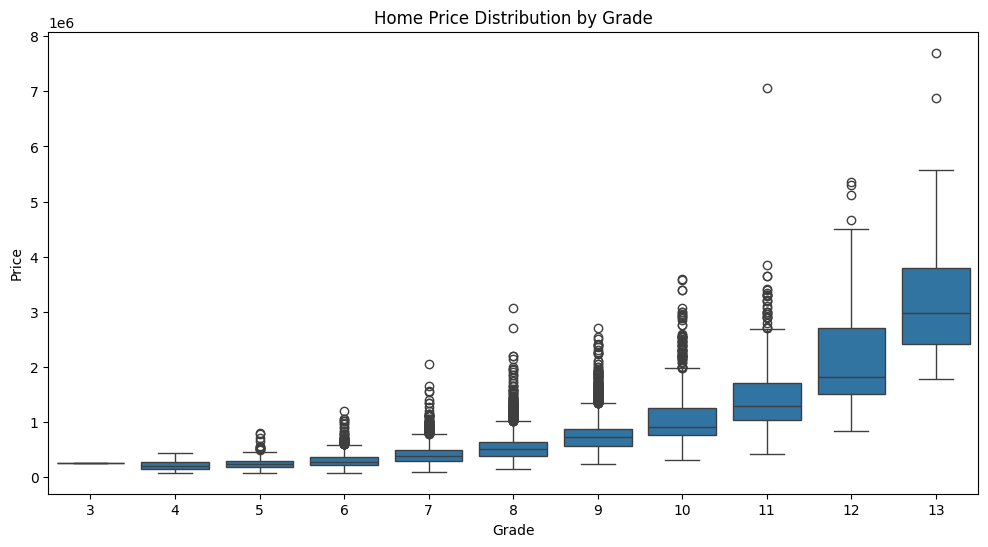

In [34]:
# Box plot to compare home prices and the grade they were assigned
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_raw, x='grade', y='price')
plt.title('Home Price Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()


In [35]:
# Add a bar chart to show the number of sale per $100,000 category

In [36]:
# Try out attribute combinations if necessary

In [37]:
# Use SimpleImputer to save median values for all NUMERICALfeatures. Reuse on test set and any new data.
# Imputation is not necessary for this dataset based on the .info() and .isnull() results above showing no null values.

In [38]:
# Consider IterativeImputer for better predictions
# Imputation is not necessary for this dataset based on the .info() and .isnull() results above showing no null values.

In [39]:
# Encode categorical attributes with OrdinalEncoder()
# Start with simplest setup, price as label and strongest correlation, sqft_living as indicator
# No categorical attributes at this point

In [40]:
# Encode binary attributes with OneHotEncoder()
# Start with simplest setup, price as label and strongest correlation, sqft_living as indicator
# No binary attributes at this point

In [41]:
# View all Scikit estimators with sklearn.set_config(display="diagram")

In [42]:
# Log transform / feature engineering
# Log transform features with np.log1p to preserve zeroes
# ** Do more research to determine whether the label, price, should be log transformed **
df_fe = df_raw.copy()
df_fe["sqft_living_log"] = np.log1p(df_fe["sqft_living"])
df_fe["sqft_above_log"] = np.log1p(df_fe["sqft_above"])
df_fe["price_log"] = np.log1p(df_fe["price"])
df_fe["sqft_living15_log"] = np.log1p(df_fe["sqft_living15"])

df_fe.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living_log,sqft_above_log,price_log,sqft_living15_log
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,0,98178,47.51,-122.26,1340,5650,7.07,7.07,12.31,7.20
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,1991,98125,47.72,-122.32,1690,7639,7.85,7.68,13.20,7.43
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,0,98028,47.74,-122.23,2720,8062,6.65,6.65,12.10,7.91
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,0,98136,47.52,-122.39,1360,5000,7.58,6.96,13.31,7.22
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,0,98074,47.62,-122.05,1800,7503,7.43,7.43,13.14,7.50


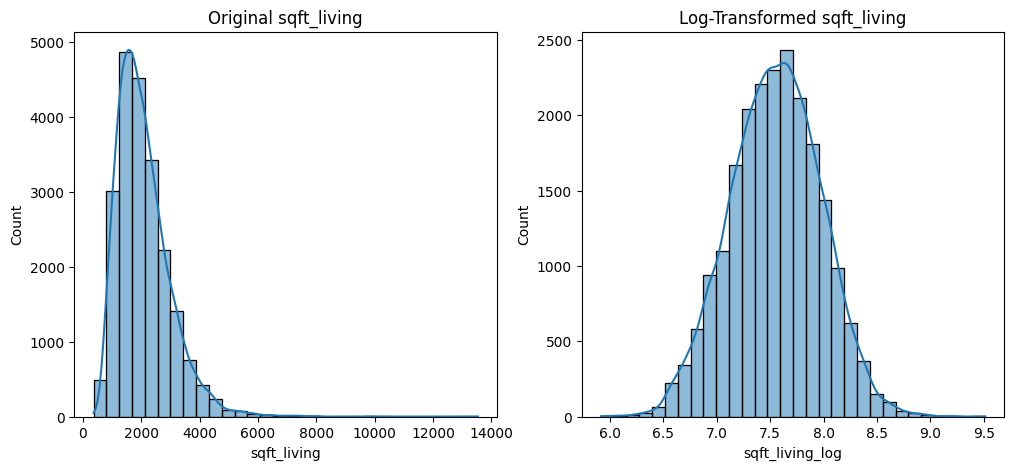

In [43]:
# Use hist() to plot original vs log-transformed sqft_living histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_fe['sqft_living'], bins=30, kde=True)
plt.title("Original sqft_living")
plt.subplot(1, 2, 2)
sns.histplot(df_fe['sqft_living_log'], bins=30, kde=True)
plt.title("Log-Transformed sqft_living")
plt.show()

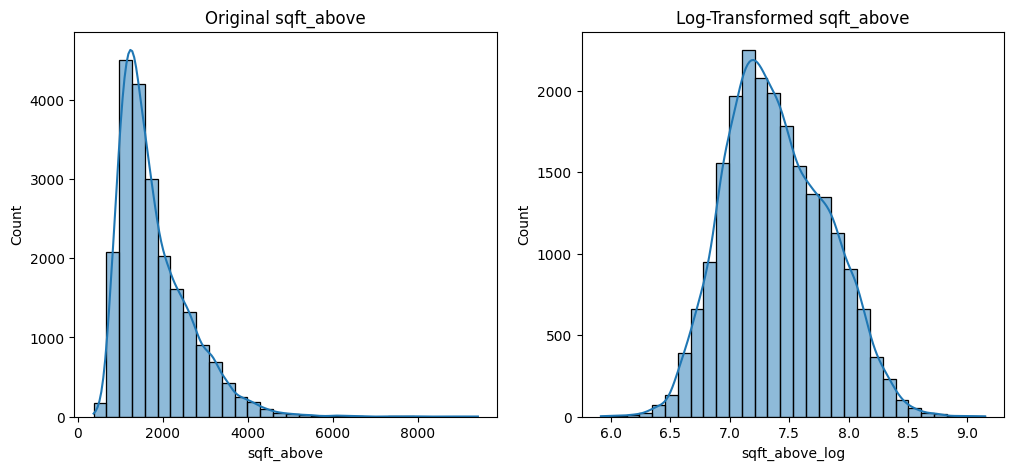

In [44]:
# Use hist() to plot original vs log-transformed sqft_above histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_fe['sqft_above'], bins=30, kde=True)
plt.title("Original sqft_above")
plt.subplot(1, 2, 2)
sns.histplot(df_fe['sqft_above_log'], bins=30, kde=True)
plt.title("Log-Transformed sqft_above")
plt.show()

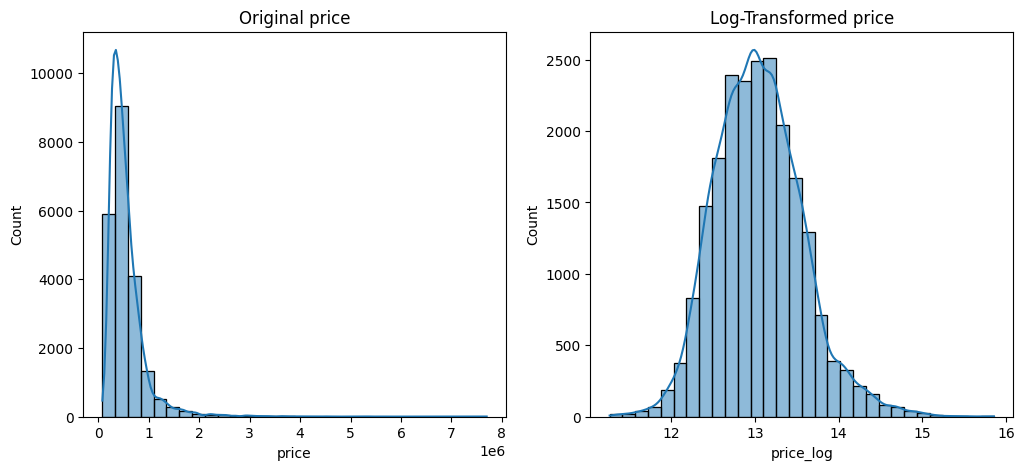

In [45]:
# Use hist() to plot original vs log-transformed feature and target histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_fe['price'], bins=30, kde=True)
plt.title("Original price")
plt.subplot(1, 2, 2)
sns.histplot(df_fe['price_log'], bins=30, kde=True)
plt.title("Log-Transformed price")
plt.show()

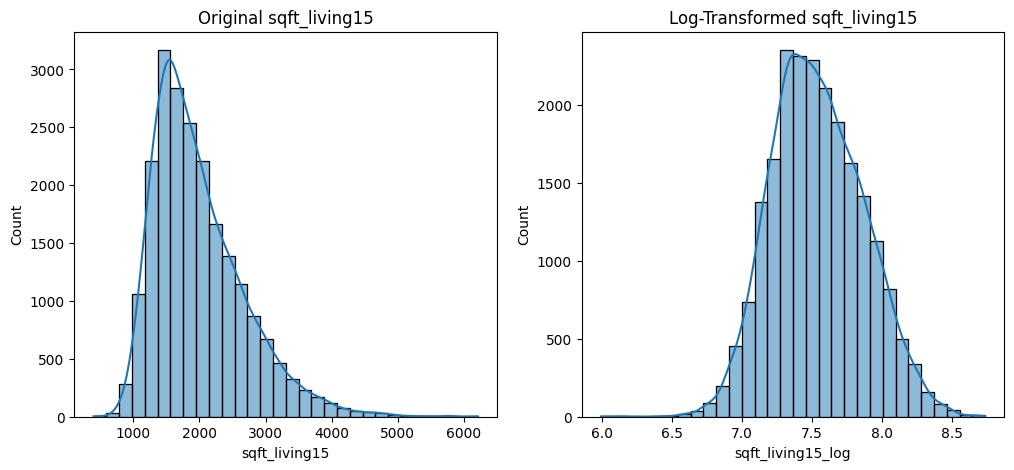

In [46]:
# Use hist() to plot original vs log-transformed sqft_living15 histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_fe['sqft_living15'], bins=30, kde=True)
plt.title("Original sqft_living15")
plt.subplot(1, 2, 2)
sns.histplot(df_fe['sqft_living15_log'], bins=30, kde=True)
plt.title("Log-Transformed sqft_living15")
plt.show()

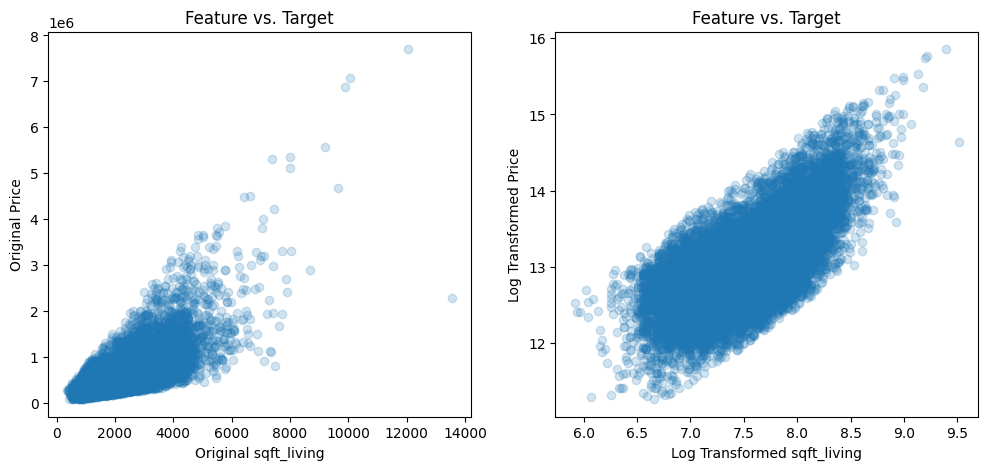

In [47]:
# Use scatter plot to plot original vs log-transformed feature and target
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_fe['sqft_living'], df_fe['price'], alpha=0.2)
plt.xlabel('Original sqft_living')
plt.ylabel('Original Price')
plt.title('Feature vs. Target')
plt.subplot(1, 2, 2)
plt.scatter(df_fe['sqft_living_log'], df_fe['price_log'], alpha=0.2)
plt.xlabel('Log Transformed sqft_living')
plt.ylabel('Log Transformed Price')
plt.title('Feature vs. Target')
plt.show()

In [48]:
# Separate features and labels
y = df_fe["price_log"]
drop_columns = ["price_log", "id", "date", "price", "condition", "sqft_living",  # "sqft_living", 
                "sqft_basement", "sqft_lot", "floors", "view", "yr_built", 
                "yr_renovated", "zipcode", "lat", "long", "sqft_living15", 
                "sqft_lot15", "sqft_above"]                                      # "waterfront", "sqft_above_log", 
                                                                                 # "sqft_living15_log", "sqft_living_log"]
X = df_fe.drop(drop_columns, axis=1)

#y.head()
X.head()

,bedrooms,bathrooms,waterfront,grade,sqft_living_log,sqft_above_log,sqft_living15_log
0,3,1.00,0,7,7.07,7.07,7.20
1,3,2.25,0,7,7.85,7.68,7.43
2,2,1.00,0,6,6.65,6.65,7.91
3,4,3.00,0,7,7.58,6.96,7.22
4,3,2.00,0,8,7.43,7.43,7.50


In [49]:
# Split into train and test sets
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [50]:
# X_train.head()
# X_test.head()
# y_train.head()
# y_test.head()

In [51]:
# Fit Scaler on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data with the same scaler
X_test_scaled = scaler.transform(X_test)

In [52]:
# Examine the train and test set outcomes
print(f'Shape of X: {X.shape}') # shape of DataFrame before splitting
print(f'Shape of y: {y.shape}') # shape of DataFrame before splitting
print(f'Shape of X_train_scaled: {X_train.shape}')
print(f'Shape of X_test_scaled: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')
print("Data splitting is complete. X_train and y_train are ready for model training. X-test and y_test are ready for subsequent testing.")

Shape of X: (21597, 7)
Shape of y: (21597,)
Shape of X_train_scaled: (17277, 7)
Shape of X_test_scaled: (4320, 7)
Shape of y_train: (17277,)
Shape of y_test: (4320,)
Data splitting is complete. X_train and y_train are ready for model training. X-test and y_test are ready for subsequent testing.


In [53]:
#import sklearn
#print(sklearn.__version__)

In [59]:
# Import and train Models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Extreme Gradient Boosting': XGBRegressor()
}

for model_name, model in models.items():
    # Training the models
    model.fit(X_train_scaled, y_train) # X_train
    
    # Making predictions on the test sets
    y_pred = model.predict(X_test_scaled) # X_test

    # Converting y_pred and y_test back to dollars
    y_pred_dollars = np.expm1(y_pred)
    y_test_dollars = np.expm1(y_test)
    
    # Running metrics to assess accuracy
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mae_dollars = mean_absolute_error(y_test_dollars, y_pred_dollars)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    mape_dollars = mean_absolute_percentage_error(y_test_dollars, y_pred_dollars) * 100
       
    # Print results of metrics
    print(f"{model_name}: MSE = {mse:.2f}, RMSE = {rmse:.2f}, MAE = {mae:.2f}, MAE $ = ${mae_dollars:.2f}, R2 = {r2:.2f}, MAPE = {mape:.2f}%, MAPE $ = {mape_dollars:.2f}%")


Linear Regression: MSE = 0.12, RMSE = 0.34, MAE = 0.28, MAE $ = $145476.47, R2 = 0.58, MAPE = 2.13%, MAPE $ = 28.61%
Ridge Regression: MSE = 0.12, RMSE = 0.34, MAE = 0.28, MAE $ = $145476.88, R2 = 0.58, MAPE = 2.13%, MAPE $ = 28.61%
Lasso Regression: MSE = 0.28, RMSE = 0.53, MAE = 0.42, MAE $ = $224257.96, R2 = -0.00, MAPE = 3.21%, MAPE $ = 44.66%
Random Forest: MSE = 0.12, RMSE = 0.34, MAE = 0.27, MAE $ = $140815.93, R2 = 0.59, MAPE = 2.07%, MAPE $ = 27.92%
Support Vector Regressor: MSE = 0.11, RMSE = 0.33, MAE = 0.26, MAE $ = $138164.50, R2 = 0.62, MAPE = 2.02%, MAPE $ = 27.45%
K-Nearest Neighbors: MSE = 0.12, RMSE = 0.35, MAE = 0.28, MAE $ = $145962.32, R2 = 0.56, MAPE = 2.15%, MAPE $ = 28.76%
Extreme Gradient Boosting: MSE = 0.11, RMSE = 0.33, MAE = 0.27, MAE $ = $140613.90, R2 = 0.61, MAPE = 2.06%, MAPE $ = 27.76%


In [60]:
# Save the trained models using joblib for incremental improvements
for model_name, model in models.items():
    
    filename = f"{model_name.replace(' ', '_').lower()}_model.joblib"
    joblib.dump(model, filename)
    print(f"Saved {model_name} to {filename}")

Saved Linear Regression to linear_regression_model.joblib
Saved Ridge Regression to ridge_regression_model.joblib
Saved Lasso Regression to lasso_regression_model.joblib
Saved Random Forest to random_forest_model.joblib
Saved Support Vector Regressor to support_vector_regressor_model.joblib
Saved K-Nearest Neighbors to k-nearest_neighbors_model.joblib
Saved Extreme Gradient Boosting to extreme_gradient_boosting_model.joblib


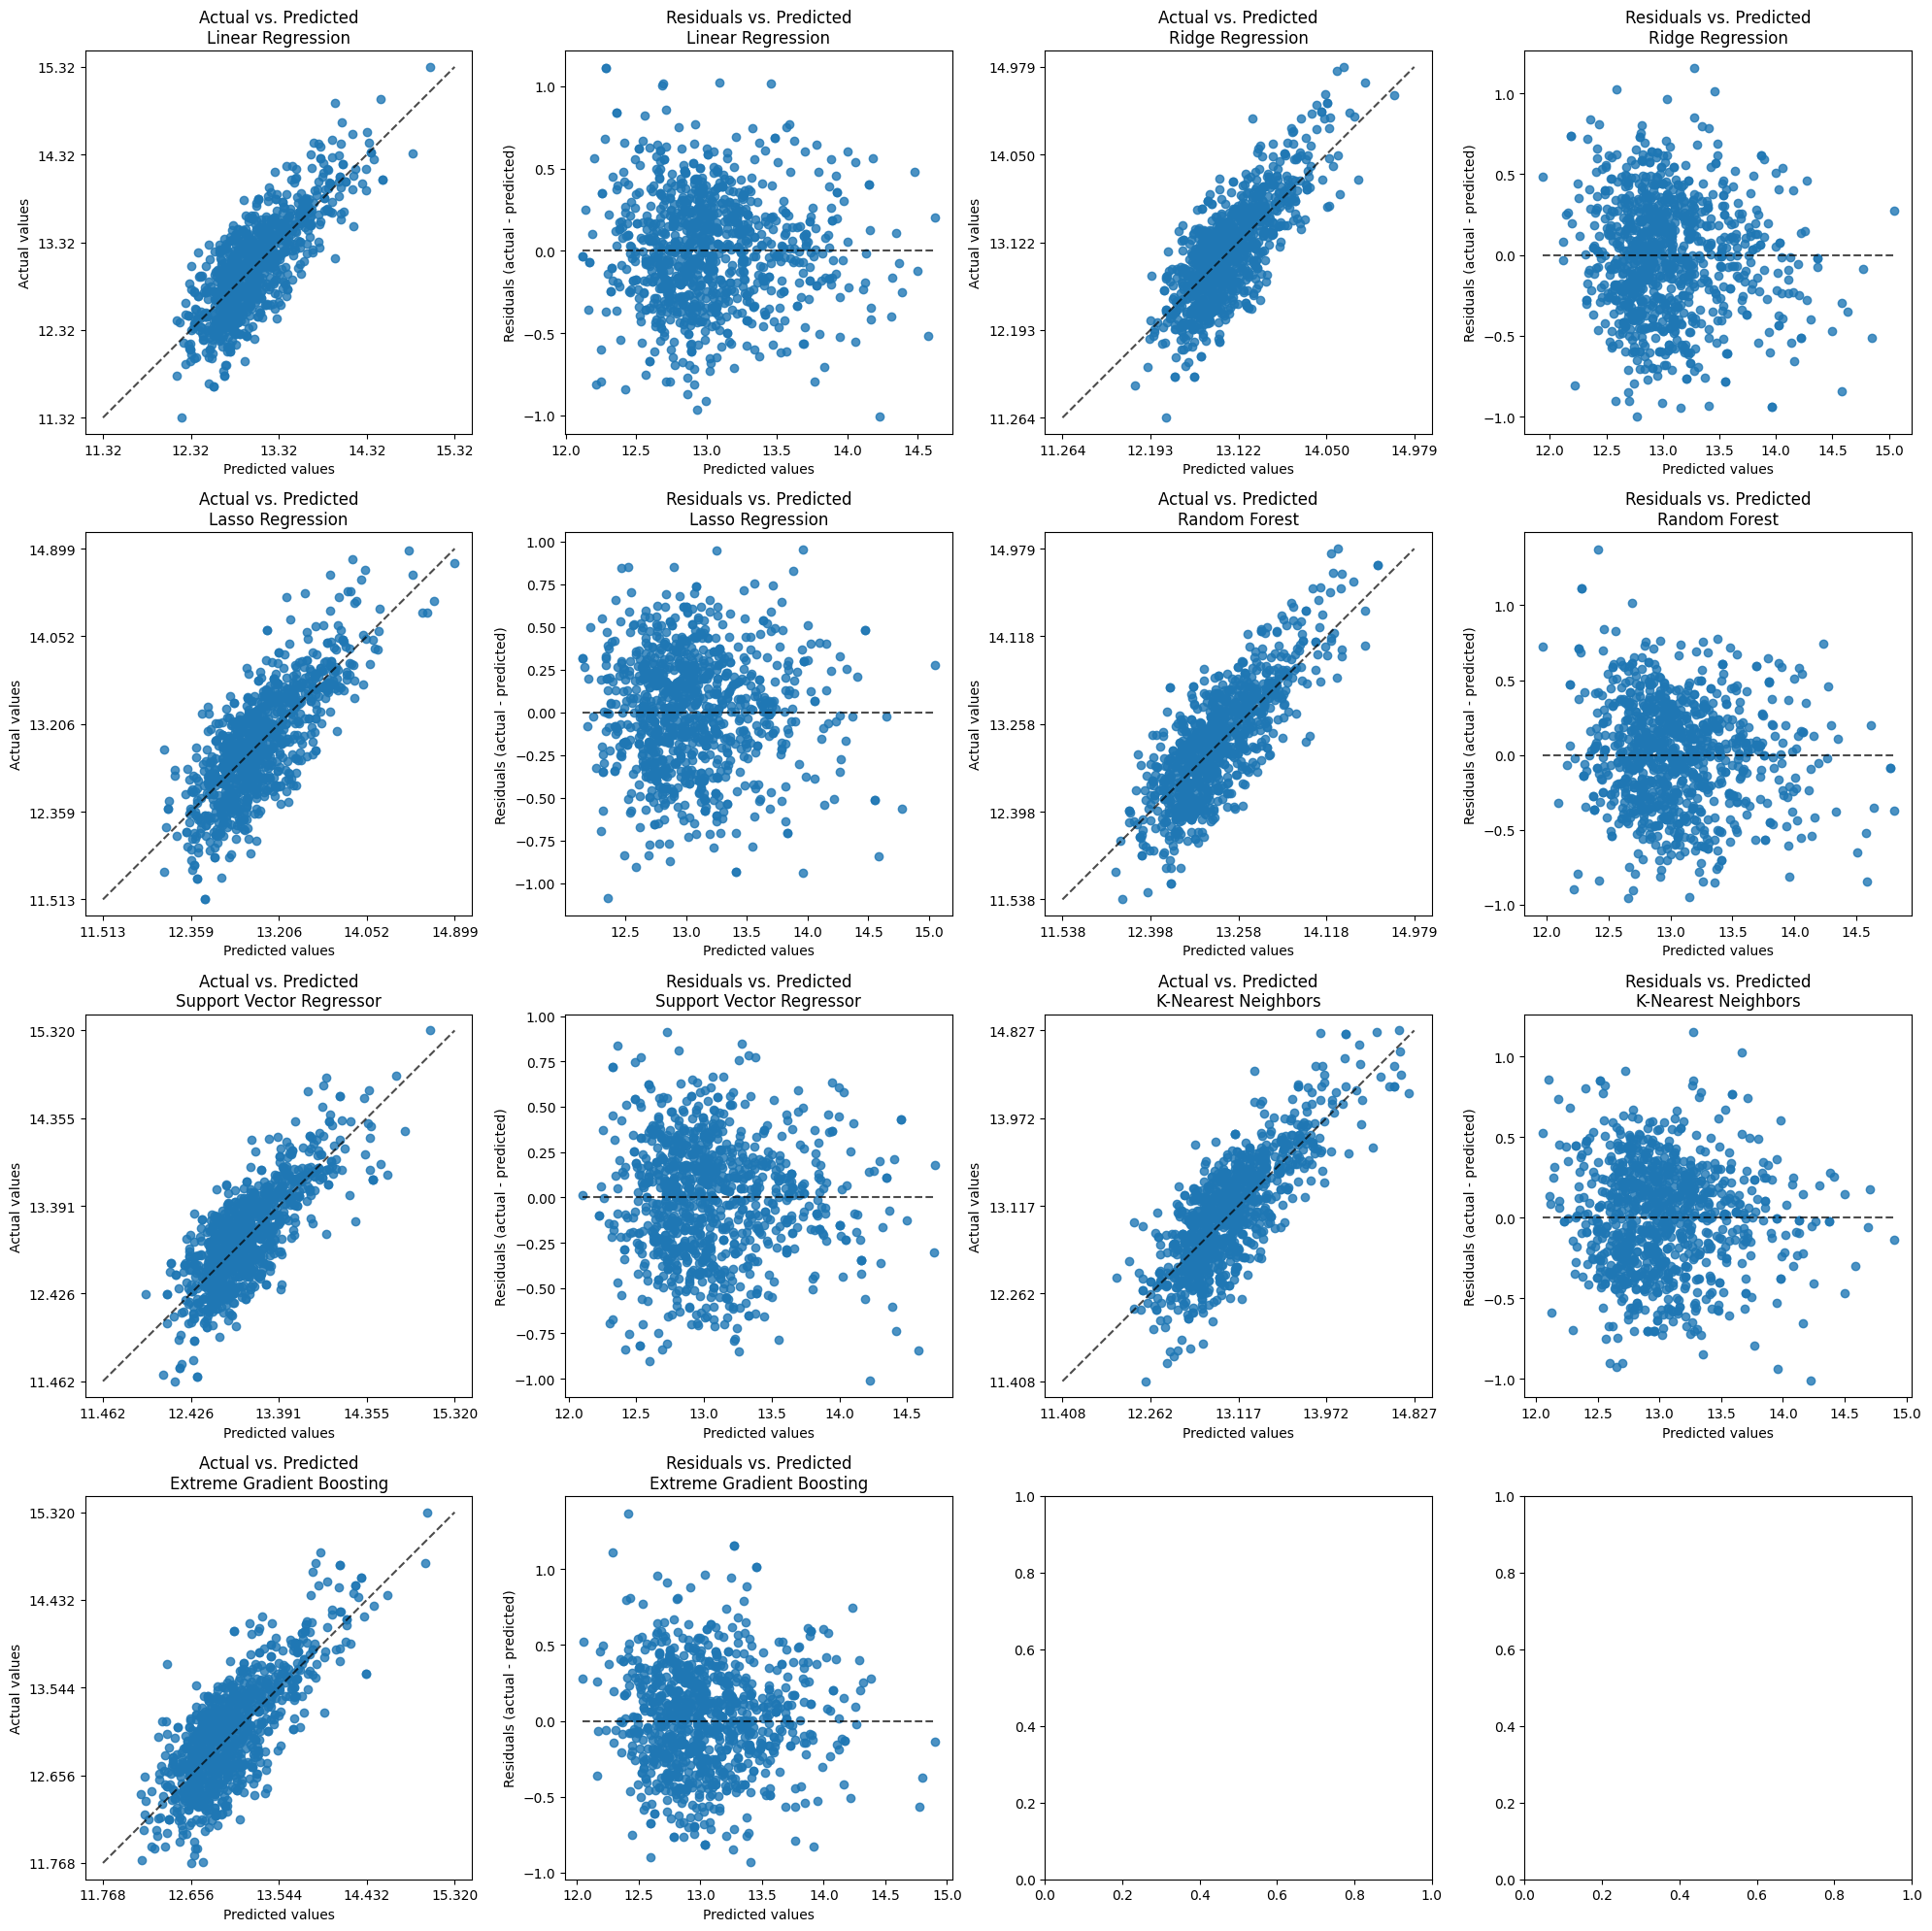

In [61]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # 4x4 grid
axes = axes.flatten()  # Flatten to easily index

for idx, (model_name, model) in enumerate(models.items()):
    
    # Actual vs. Predicted
    PredictionErrorDisplay.from_predictions(
        y_true=y_test, y_pred=y_pred, kind="actual_vs_predicted", ax=axes[2*idx])
    axes[2*idx].set_title(f"Actual vs. Predicted\n{model_name}")
    
    # Residuals vs. Predicted
    PredictionErrorDisplay.from_predictions(
       y_true=y_test, y_pred=y_pred, kind="residual_vs_predicted", ax=axes[2*idx+1])
    axes[2*idx+1].set_title(f"Residuals vs. Predicted\n{model_name}")
    
plt.tight_layout()
plt.show()

In [62]:
feature_names = X_train.columns

for name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
    model = models[name]
    coefs = model.coef_
    importance = np.abs(coefs)
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    print(f"\n{name} Feature Importances:")
    print(importance_df)


Linear Regression Feature Importances:
             Feature  Importance
3              grade        0.24
4    sqft_living_log        0.23
5     sqft_above_log        0.11
6  sqft_living15_log        0.06
2         waterfront        0.06
0           bedrooms        0.02
1          bathrooms        0.00

Ridge Regression Feature Importances:
             Feature  Importance
3              grade        0.24
4    sqft_living_log        0.23
5     sqft_above_log        0.11
6  sqft_living15_log        0.06
2         waterfront        0.06
0           bedrooms        0.02
1          bathrooms        0.00

Lasso Regression Feature Importances:
             Feature  Importance
0           bedrooms        0.00
1          bathrooms        0.00
2         waterfront        0.00
3              grade        0.00
4    sqft_living_log        0.00
5     sqft_above_log        0.00
6  sqft_living15_log        0.00


In [63]:
# First run shows Lasso Regression with all zeroes for importances. Need to scale X_train, then fit X_test.
# After scaling, Lasso Regression still shows all zeroes for importances. More work needed for Lasso Regression.
# SVR and XGBoost both outperform Lasso Regression. Saving additional work on Lasso for another time.

In [64]:
for name in ['Random Forest', 'Extreme Gradient Boosting']:
    model = models[name]  # Get the trained model by string key
    importance = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    print(f"\n{name} Feature Importances:")
    print(importance_df)


Random Forest Feature Importances:
             Feature  Importance
3              grade        0.43
4    sqft_living_log        0.21
6  sqft_living15_log        0.16
5     sqft_above_log        0.10
1          bathrooms        0.05
0           bedrooms        0.03
2         waterfront        0.01

Extreme Gradient Boosting Feature Importances:
             Feature  Importance
3              grade        0.70
2         waterfront        0.11
4    sqft_living_log        0.10
6  sqft_living15_log        0.03
5     sqft_above_log        0.03
1          bathrooms        0.02
0           bedrooms        0.02


In [65]:
# Tune Parameters with Grid Search and Random Search

In [66]:
# Get widget input and output working.
# Then invert the log price to output a sale price in dollars.
# The text boxes where the user can input values.
sqft_living_log_widget = widgets.FloatText(
    description='LSF:', 
    value=2570,
    min=300,
    max=13500,
    step=100
)

sqft_above_log_widget = widgets.FloatText(
    description='SFAG:', 
    value=2170,
    min=300,
    max=13500,
    step=100
)

sqft_living15_log_widget = widgets.FloatText(
    description='SFL15:', 
    value=1690,
    min=300,
    max=13500,
    step=100
)

bedrooms_widget = widgets.FloatText(
    description='BR:', 
    value=3,
    min=1,
    max=33,
    step=1
)

bathrooms_widget = widgets.FloatText(
    description='BA:', 
    value=2.25,
    min=1,
    max=30,
    step=1
)

grade_widget = widgets.FloatText(
    description='GR:', 
    value=7,
    min=1,
    max=13,
    step=1
)

waterfront_widget = widgets.Checkbox(
    value=False,
    description='Waterfront Property',
    disabled=False,
    indent=True
)

#A button for the user to get predictions using input valus. 
button_predict = widgets.Button( description='Predict' )
button_output = widgets.Label(value='Enter values and press the \"Predict\" button.' )

# Defines what happens when you click the button 
# Revise this function to apply to xgboost model
def on_click_predict(b):
    prediction = models['Extreme Gradient Boosting'].predict([[  # 'Linear Regression', 'Random Forest', 'Extreme Gradient Boosting'
        np.log1p(sqft_living_log_widget.value), 
        np.log1p(sqft_above_log_widget.value), 
        np.log1p(sqft_living15_log_widget.value), 
        bedrooms_widget.value,
        bathrooms_widget.value,
        grade_widget.value,
        waterfront_widget.value]])
    button_output.value='Prediction = '+ f"${np.expm1(prediction[0]):,.0f}"
button_predict.on_click(on_click_predict)

#Displays the text boxes and buttons inside a VBox 
vb=widgets.VBox([sqft_living_log_widget, 
                 sqft_above_log_widget, 
                 sqft_living15_log_widget, 
                 bedrooms_widget,
                 bathrooms_widget,
                 grade_widget,
                 waterfront_widget,
                 button_predict, 
                 button_output])
print('\n\033[1m' + 'Enter Values to Predict Sales Price' + '\033[0m\n\n'
     '\033[1m' + 'Values Key:' + '\033[0m\n',
     'LSF: Living Square Footage\n',
     'SFAG: Square Footage Above Ground\n',
     'SFL15: Average Square Footage of Nearest 15 Homes\n',
     'BR: Number of Bedrooms\n',
     'BA: Number of Bathrooms\n',
     'GR: Grade of Construction & Design (1-13)\n',
     'WF: Waterfront (Check for waterfront properties)\n'
     )

display(vb)

# According to the widget docs, 
# https://ipywidgets.readthedocs.io/en/7.6.3/examples/Widget%20Styling.html
# you cannot adjust the description length. For adjusting widget display behavior, 
# you can use a labeled HBox contained in the VBox.


Enter Values to Predict Sales Price

Values Key:
 LSF: Living Square Footage
 SFAG: Square Footage Above Ground
 SFL15: Average Square Footage of Nearest 15 Homes
 BR: Number of Bedrooms
 BA: Number of Bathrooms
 GR: Grade of Construction & Design (1-13)
 WF: Waterfront (Check for waterfront properties)

